In [1]:
import pandas as pd
import numpy as np
import dtale
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats.distributions import uniform

In [2]:
# Load dataset and check columns (features) available
# target (match outcome) is 1=no-score draw, 2=score draw, 3=home win, 4=away win
dataset = pd.read_csv('./cleaned_dataset.csv')
X = dataset.drop(columns=['outcome','link'])
y = dataset.outcome
X.columns.to_list()

['season',
 'capacity',
 'elo_home',
 'elo_away',
 'home_newly_promoted',
 'home_newly_relegated',
 'away_newly_promoted',
 'away_newly_relegated',
 'home_goals_f_cum',
 'home_goals_a_cum',
 'away_goals_a_cum',
 'away_goals_f_cum',
 'home_streak',
 'away_streak']

## Lasso regression

to see which features might be worth dropping

In [3]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print(lasso.coef_)

[-0.00226391  0.          0.          0.0025078   0.         -0.
  0.         -0.         -0.00345     0.00940341 -0.00467218  0.01181737
 -0.0294981   0.04137891]


In [4]:
# drop columns for which lasso coefficient is 0
# except elo_home ... feels like we ought to keep the Elo coefficients
X = X.drop(columns=['season','capacity','home_newly_promoted','away_newly_promoted','home_newly_relegated','away_newly_relegated'])

In [5]:
# prep to scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
# scale data and create train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [11]:
# discover which metrics are available when using GridSearchCV
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

## Randomized search for random forest

In [35]:
np.random.seed(2)
# random forest GridSearch
gs = RandomizedSearchCV(RandomForestClassifier(),
                  {'n_estimators':range(1,30), 'max_depth':range(1,50)},
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................max_depth=42, n_estimators=4; total time=   0.2s
[CV] END .......................max_depth=42, n_estimators=4; total time=   0.2s
[CV] END .......................max_depth=42, n_estimators=4; total time=   0.2s
[CV] END .......................max_depth=42, n_estimators=4; total time=   0.2s
[CV] END .......................max_depth=42, n_estimators=4; total time=   0.2s
[CV] END .......................max_depth=19, n_estimators=6; total time=   0.2s
[CV] END .......................max_depth=19, n_estimators=6; total time=   0.2s
[CV] END .......................max_depth=19, n_estimators=6; total time=   0.2s
[CV] END .......................max_depth=19, n_estimators=6; total time=   0.2s
[CV] END .......................max_depth=19, n_estimators=6; total time=   0.2s
[CV] END .......................max_depth=18, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=18, n_

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 50),
                                        'n_estimators': range(1, 30)},
                   scoring='accuracy', verbose=2)

In [36]:
print(gs.best_score_)
print(gs.best_estimator_)

0.6974294958974155
RandomForestClassifier(max_depth=15, n_estimators=28)


## Grid search for random forest

In [30]:
np.random.seed(2)
# random forest GridSearch
gs = GridSearchCV(RandomForestClassifier(),
                  {'n_estimators':[20,25,28,30,35], 'max_depth':[11,13,15,17,19]},
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................max_depth=11, n_estimators=20; total time=   0.5s
[CV] END ......................max_depth=11, n_estimators=20; total time=   0.5s
[CV] END ......................max_depth=11, n_estimators=20; total time=   0.5s
[CV] END ......................max_depth=11, n_estimators=20; total time=   0.5s
[CV] END ......................max_depth=11, n_estimators=20; total time=   0.5s
[CV] END ......................max_depth=11, n_estimators=25; total time=   0.6s
[CV] END ......................max_depth=11, n_estimators=25; total time=   0.6s
[CV] END ......................max_depth=11, n_estimators=25; total time=   0.6s
[CV] END ......................max_depth=11, n_estimators=25; total time=   0.6s
[CV] END ......................max_depth=11, n_estimators=25; total time=   0.6s
[CV] END ......................max_depth=11, n_estimators=28; total time=   0.7s
[CV] END ......................max_depth=11, n_

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [11, 13, 15, 17, 19],
                         'n_estimators': [20, 25, 28, 30, 35]},
             scoring='accuracy', verbose=2)

In [31]:
print(gs.best_score_)
# 0.70092
print(gs.best_estimator_)
# RandomForestClassifier(max_depth=17, n_estimators=20)

0.7009236291642696
RandomForestClassifier(max_depth=17, n_estimators=20)


## Check under/over fit for Random Forest

In [48]:
# manual trial and error to get best parameters here
rf = gs.best_estimator_.set_params(max_depth=13)
rf.fit(X_train, y_train)
print("Training score:", rf.score(X_train, y_train))
print("Validation score:", rf.score(X_val, y_val))
# this overfits somewhat so we will drop the max_depth down slightly
print(rf.feature_importances_)
print('max_depth:',rf.max_depth,'n_estimators:', rf.n_estimators)

Training score: 0.7021209011386405
Validation score: 0.6930218921032056
[0.01587821 0.02167288 0.05497488 0.04972991 0.04985279 0.05283115
 0.39978144 0.35527874]
max_depth: 13 n_estimators: 20


## Grid search on MLP Classifier

In [9]:
# MLP gridsearch
gs = GridSearchCV(MLPClassifier(),
                  {'activation':['logistic'], 'hidden_layer_sizes':[(100,),(50,50),(50,40,30),(50,20,25,50)], 'learning_rate':['adaptive']},
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  21.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  23.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  19.8s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  18.6s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate=adaptive; total time=  18.8s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), learning_rate=adaptive; total time=  49.0s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), learning_rate=adaptive; total time=  47.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), learning_rate=adaptive; total time=  48.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), learning_rate=adaptive; total time=  45.9s
[CV] END activation=logistic, hi

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [(100,), (50, 50), (50, 40, 30),
                                                (50, 20, 25, 50)],
                         'learning_rate': ['adaptive']},
             scoring='accuracy', verbose=2)

In [10]:
print(gs.best_score_)
print(gs.best_estimator_)

# 0.7044543461856337
# MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50),
            #   learning_rate='adaptive')

0.7003494669847493
MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50),
              learning_rate='adaptive')


In [12]:
print('test score:', gs.best_estimator_.score(X_test, y_test))

test score: 0.6977812530544424


## Grid search for Bagging classifier

In [77]:
# Bagging gridsearch
gs = GridSearchCV(BaggingClassifier(),
                  {'max_samples':[1900,2000,2250,2500], 'n_estimators':[5,10,15,20]},
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................max_samples=1900, n_estimators=5; total time=   0.1s
[CV] END ...................max_samples=1900, n_estimators=5; total time=   0.1s
[CV] END ...................max_samples=1900, n_estimators=5; total time=   0.1s
[CV] END ...................max_samples=1900, n_estimators=5; total time=   0.1s
[CV] END ...................max_samples=1900, n_estimators=5; total time=   0.1s
[CV] END ..................max_samples=1900, n_estimators=10; total time=   0.1s
[CV] END ..................max_samples=1900, n_estimators=10; total time=   0.1s
[CV] END ..................max_samples=1900, n_estimators=10; total time=   0.1s
[CV] END ..................max_samples=1900, n_estimators=10; total time=   0.1s
[CV] END ..................max_samples=1900, n_estimators=10; total time=   0.1s
[CV] END ..................max_samples=1900, n_estimators=15; total time=   0.1s
[CV] END ..................max_samples=1900, n_e

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'max_samples': [1900, 2000, 2250, 2500],
                         'n_estimators': [5, 10, 15, 20]},
             scoring='accuracy', verbose=2)

In [78]:
print(gs.best_score_)
print(gs.best_estimator_)
gs.best_estimator_.set_params(n_estimators=15)
gs.best_estimator_.fit(X_train, y_train)
print('training score:', gs.best_estimator_.score(X_train, y_train))
print('test score:', gs.best_estimator_.score(X_test, y_test))

0.6852001425259671
BaggingClassifier(max_samples=2500, n_estimators=20)
training score: 0.7025729365195719
test score: 0.690255107027661


## Grid search for AdaBoost

In [80]:
gs = RandomizedSearchCV(AdaBoostClassifier(),
                  {'learning_rate':[0.1,0.5,0.9,1], 'n_estimators':range(1,100)},
                  n_iter=50,
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .................learning_rate=0.5, n_estimators=54; total time=   1.2s
[CV] END .................learning_rate=0.5, n_estimators=54; total time=   1.2s
[CV] END .................learning_rate=0.5, n_estimators=54; total time=   1.1s
[CV] END .................learning_rate=0.5, n_estimators=54; total time=   1.1s
[CV] END .................learning_rate=0.5, n_estimators=54; total time=   1.1s
[CV] END .................learning_rate=0.1, n_estimators=16; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=16; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=16; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=16; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=16; total time=   0.3s
[CV] END ...................learning_rate=1, n_estimators=38; total time=   0.8s
[CV] END ...................learning_rate=1, n_

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=50,
                   param_distributions={'learning_rate': [0.1, 0.5, 0.9, 1],
                                        'n_estimators': range(1, 100)},
                   scoring='accuracy', verbose=2)

In [82]:
print(gs.best_score_)
print(gs.best_estimator_)
print('training score:', gs.best_estimator_.score(X_train, y_train))
print('test score:',gs.best_estimator_.score(X_test, y_test))

0.6947539973671727
AdaBoostClassifier(learning_rate=1, n_estimators=71)
training score: 0.6938987440746713
test score: 0.6951422148372594


In [88]:
gs = GridSearchCV(AdaBoostClassifier(learning_rate=1),
                  {'n_estimators':range(60,70)},
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................................n_estimators=60; total time=   1.3s
[CV] END ....................................n_estimators=60; total time=   1.3s
[CV] END ....................................n_estimators=60; total time=   1.3s
[CV] END ....................................n_estimators=60; total time=   1.3s
[CV] END ....................................n_estimators=60; total time=   1.3s
[CV] END ....................................n_estimators=61; total time=   1.3s
[CV] END ....................................n_estimators=61; total time=   1.3s
[CV] END ....................................n_estimators=61; total time=   1.3s
[CV] END ....................................n_estimators=61; total time=   1.3s
[CV] END ....................................n_estimators=61; total time=   1.3s
[CV] END ....................................n_estimators=62; total time=   1.3s
[CV] END ....................................n_e

GridSearchCV(estimator=AdaBoostClassifier(learning_rate=1),
             param_grid={'n_estimators': range(60, 70)}, scoring='accuracy',
             verbose=2)

In [89]:
print(gs.best_score_)
print(gs.best_estimator_)
print('training score:', gs.best_estimator_.score(X_train, y_train))
print('test score:',gs.best_estimator_.score(X_test, y_test))

0.6948150697963422
AdaBoostClassifier(learning_rate=1, n_estimators=68)
training score: 0.6946073400772125
test score: 0.6953376991496433


## Grid search on Extra trees

In [91]:
gs = RandomizedSearchCV(ExtraTreesClassifier(),
                  {'max_depth':uniform(2,50), 'n_estimators':range(50,250)},
                  n_iter=25,
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......max_depth=44.07861930607705, n_estimators=157; total time=   5.7s
[CV] END ......max_depth=44.07861930607705, n_estimators=157; total time=   5.6s
[CV] END ......max_depth=44.07861930607705, n_estimators=157; total time=   5.6s
[CV] END ......max_depth=44.07861930607705, n_estimators=157; total time=   5.7s
[CV] END ......max_depth=44.07861930607705, n_estimators=157; total time=   5.7s
[CV] END .......max_depth=26.54942317622031, n_estimators=92; total time=   2.4s
[CV] END .......max_depth=26.54942317622031, n_estimators=92; total time=   2.4s
[CV] END .......max_depth=26.54942317622031, n_estimators=92; total time=   2.4s
[CV] END .......max_depth=26.54942317622031, n_estimators=92; total time=   2.4s
[CV] END .......max_depth=26.54942317622031, n_estimators=92; total time=   2.4s
[CV] END ......max_depth=31.39218478753778, n_estimators=177; total time=   5.5s
[CV] END ......max_depth=31.39218478753778, n_e

RandomizedSearchCV(estimator=ExtraTreesClassifier(), n_iter=25,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16a308250>,
                                        'n_estimators': range(50, 250)},
                   scoring='accuracy', verbose=2)

In [99]:
print(gs.best_score_)
print(gs.best_estimator_)
# overfitting ... drop down n_estimators
gs.best_estimator_.set_params(n_estimators=150, max_depth=15)
gs.best_estimator_.fit(X_train, y_train)
print('training score:', gs.best_estimator_.score(X_train, y_train))
print('test score:',gs.best_estimator_.score(X_test, y_test))

0.6938010219435735
ExtraTreesClassifier(max_depth=15, n_estimators=150)
training score: 0.6802399452670674
test score: 0.6712931287264197


## Grid search on K-Nearest Neighbours classifier

In [15]:
gs = RandomizedSearchCV(KNeighborsClassifier(),
                  {'n_neighbors':range(1,150), 'weights':['uniform']},
                  n_iter=25,
                  scoring='accuracy',
                  verbose=2)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ....................n_neighbors=64, weights=uniform; total time=   2.4s
[CV] END ....................n_neighbors=64, weights=uniform; total time=   2.3s
[CV] END ....................n_neighbors=64, weights=uniform; total time=   2.3s
[CV] END ....................n_neighbors=64, weights=uniform; total time=   2.4s
[CV] END ....................n_neighbors=64, weights=uniform; total time=   2.4s
[CV] END ...................n_neighbors=139, weights=uniform; total time=   3.2s
[CV] END ...................n_neighbors=139, weights=uniform; total time=   3.2s
[CV] END ...................n_neighbors=139, weights=uniform; total time=   3.6s
[CV] END ...................n_neighbors=139, weights=uniform; total time=   3.4s
[CV] END ...................n_neighbors=139, weights=uniform; total time=   3.4s
[CV] END ...................n_neighbors=117, weights=uniform; total time=   3.0s
[CV] END ...................n_neighbors=117, we

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=25,
                   param_distributions={'n_neighbors': range(1, 150),
                                        'weights': ['uniform']},
                   scoring='accuracy', verbose=2)

In [16]:
print(gs.best_score_)
print(gs.best_estimator_)
# overfitting ... drop down n_neighbors and (more significantly) set weights to uniform
# tried with weights=distance but that overfitted horribly, so abandoned it as an idea
gs.best_estimator_.fit(X_train, y_train)
print('training score:', gs.best_estimator_.score(X_train, y_train))
print('test score:',gs.best_estimator_.score(X_test, y_test))

0.6765381682905695
KNeighborsClassifier(n_neighbors=64)
training score: 0.6926281581390803
test score: 0.6807741178770403


## Compare models

using optimised hyperparameters for each from grid/random searches already done

Multi-layer perceptron:
test: 0.7063135261923378, train: 0.7120901138640473


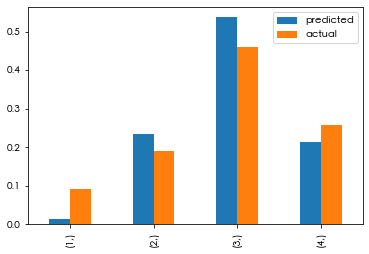

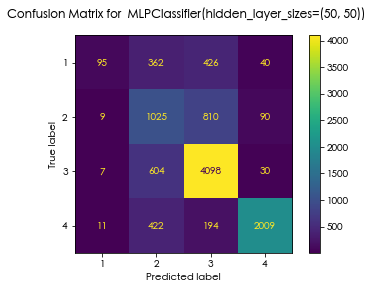

-------------
Random Forest:
test: 0.6968334636434714, train: 0.703843522455163


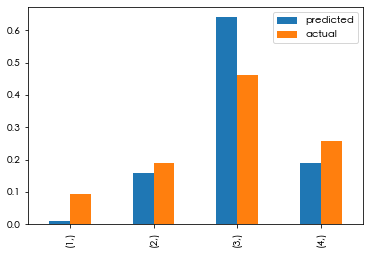

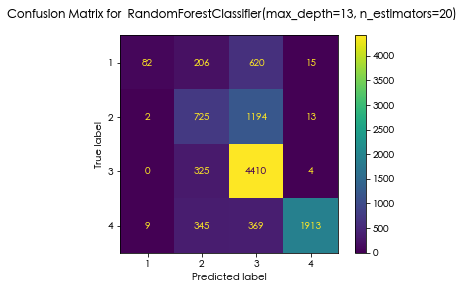

-------------
Bagging:
test: 0.6930218921032056, train: 0.7169158969848018


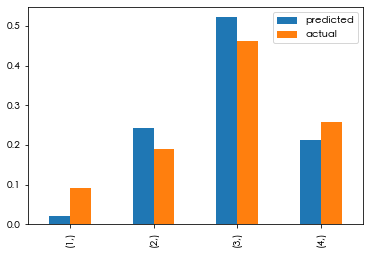

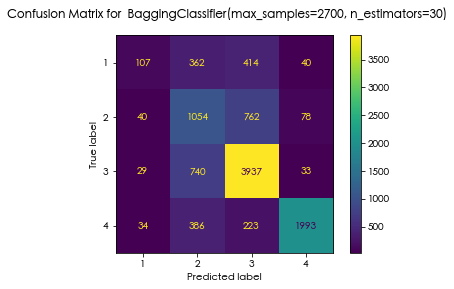

-------------
Ada boost:
test: 0.6958561376075059, train: 0.697759370571275


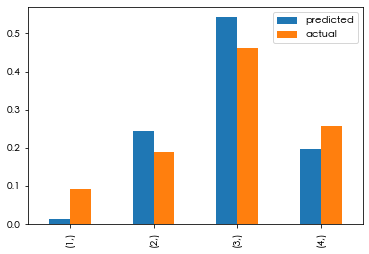

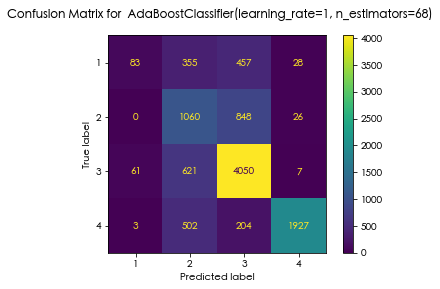

-------------
Extra trees:
test: 0.6698592650508209, train: 0.6801422078874065


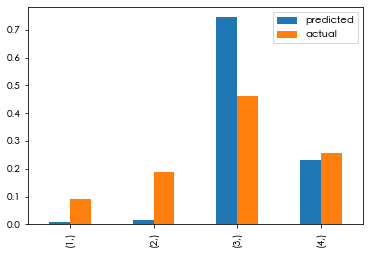

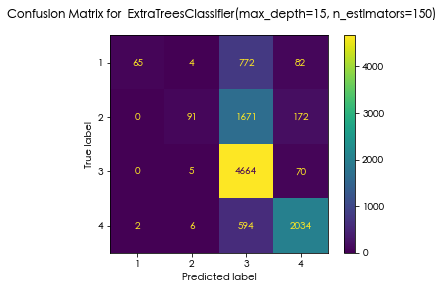

-------------
K neighbours:
test: 0.6771892103205629, train: 0.6872526022577334


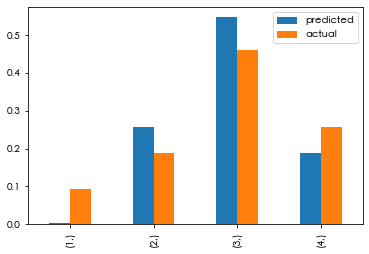

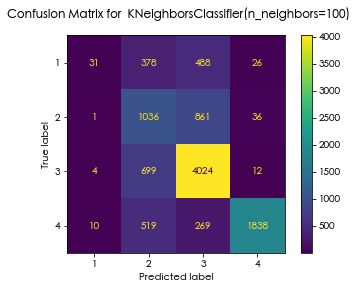

-------------


In [7]:
models = {
    # 'Multi-layer perceptron': [MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50),learning_rate='adaptive')],
    'Multi-layer perceptron': [MLPClassifier(hidden_layer_sizes=(50, 50))],
    'Random Forest': [RandomForestClassifier(max_depth=13, n_estimators=20)],
    'Bagging': [BaggingClassifier(n_estimators=30, max_samples=2700)],
    'Ada boost': [AdaBoostClassifier(learning_rate=1, n_estimators=68)],
    'Extra trees': [ExtraTreesClassifier(n_estimators=150, max_depth=15)],
    'K neighbours': [KNeighborsClassifier(n_neighbors=100, weights='uniform')]
}

actual = pd.DataFrame(y_train).value_counts(normalize=True, sort=False)
for model in models:
    print(f"{model}:")
    test_model = models[model][0]
    test_model.fit(X_train, y_train)
    acc = accuracy_score(y_val, test_model.predict(X_val))
    train_acc = accuracy_score(y_train, test_model.predict(X_train))
    print(f"test: {acc}, train: {train_acc}")
    predicted = pd.DataFrame(test_model.predict(X_train)).value_counts(normalize=True, sort=False)
    pd.concat([predicted, actual], axis=1, keys=['predicted','actual']).plot(kind='bar')
    models[model].extend([acc, train_acc])
    fig=plot_confusion_matrix(test_model, X_val, y_val)
    fig.figure_.suptitle("Confusion Matrix for  " + str(test_model))
    plt.show()
    print('-------------')

## Going forward with the MLP (or others)

Three models here: all perform well in testing, and also validation (below). But when saved and then used for prediction, their performance varies wildly. Why??

In [16]:
type = 'mlp'
football_classifier = MLPClassifier(hidden_layer_sizes=(50, 50), random_state=53)
# type = 'knn'
# football_classifier = KNeighborsClassifier(n_neighbors=100, weights='uniform')
# type = 'ada'
# football_classifier = AdaBoostClassifier(learning_rate=1, n_estimators=68)

football_classifier.fit(X_train, y_train)
print('validation score:', football_classifier.score(X_val, y_val))

validation score: 0.7017200938232995


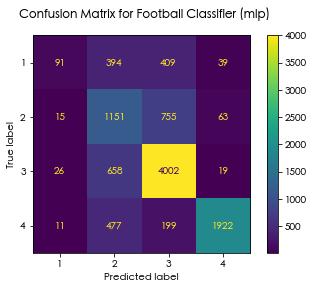

In [17]:
fig=plot_confusion_matrix(football_classifier, X_test, y_test)
fig.figure_.suptitle(f"Confusion Matrix for Football Classifier ({type})")
plt.show()

In [18]:
# save model
from joblib import dump
dump(football_classifier, f'football_classifier_{type}.pkl')

['football_classifier_mlp.pkl']

## Proportions of results in the training data

We should be looking for broadly similar proportions in the prediction data. This is shown visually in the bar plots above for each model type, but numerically here for more precise comparison.

1    0.092594
2    0.188890
3    0.461272
4    0.257245
Name: outcome, dtype: float64


<AxesSubplot:>

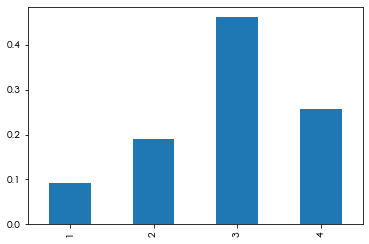

In [24]:
proportions = y_train.sort_values().value_counts(normalize=True, sort=False)
print(proportions)
proportions.plot(kind='bar')